In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [37]:
df= pd.read_csv("./diabetes.csv", sep=";")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [34]:
df.shape

(768, 9)

In [38]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [39]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

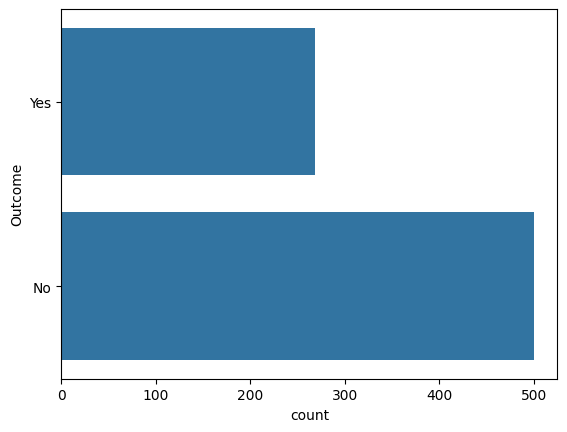

In [40]:
sns.countplot(df["Outcome"])

In [43]:
from imblearn.over_sampling import SMOTE

over_sample= SMOTE(random_state= 42)

X= df.drop("Outcome", axis=1)
y= df.Outcome

X_over, y_over= over_sample.fit_resample(X,y)

<Axes: xlabel='count', ylabel='Outcome'>

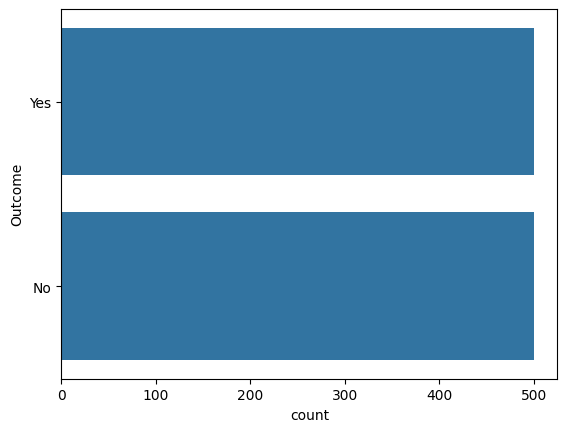

In [44]:
sns.countplot(y_over)

In [45]:
print(df.shape)
print(X_over.shape)

(768, 9)
(1000, 8)


In [67]:
y_over.replace(to_replace= "Yes", value= 1, inplace=True)
y_over.replace(to_replace= "No", value= 0, inplace= True)

C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_4964\4031217953.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_over.replace(to_replace= "No", value= 0, inplace= True)


<Axes: >

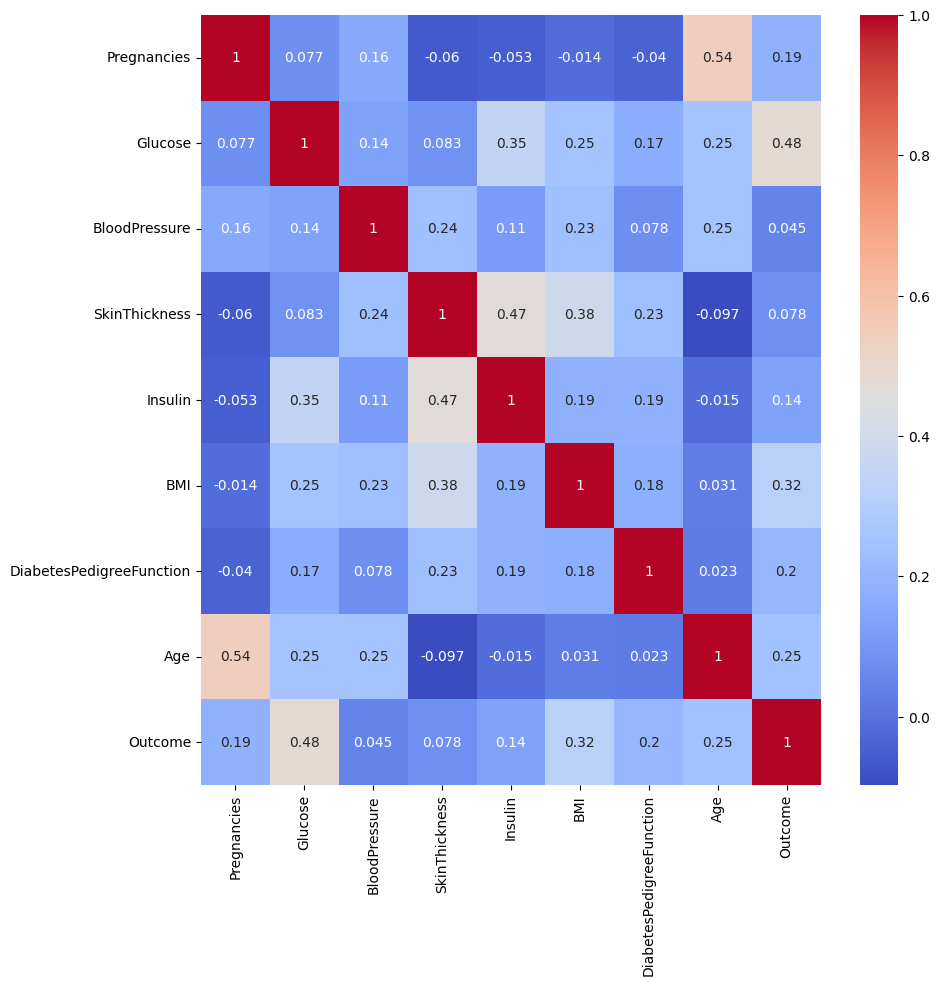

In [71]:
df2= pd.concat([X_over, y_over], axis=1)

plt.figure(figsize= (10,10))
sns.heatmap(df2.corr(), annot= True, cmap= "coolwarm")

In [49]:
#Escalar los datos

X_train, X_test, y_train, y_test= train_test_split(X_over, y_over)

sc_x= StandardScaler()
X_train= sc_x.fit_transform(X_train)
X_test= sc_x.transform(X_test)

In [53]:
def logistic_model(C_, solver_, multiclass_):
    logistic_regression_model= LogisticRegression(random_state= 42, C= C_, solver= solver_, multi_class= multiclass_, n_jobs= -1)
    return logistic_regression_model

In [85]:
model= logistic_model(1, "lbfgs", "multinomial")
model.fit(X_train, y_train)

predictions= model.predict(X_test)

Model Accuracy:  0.748


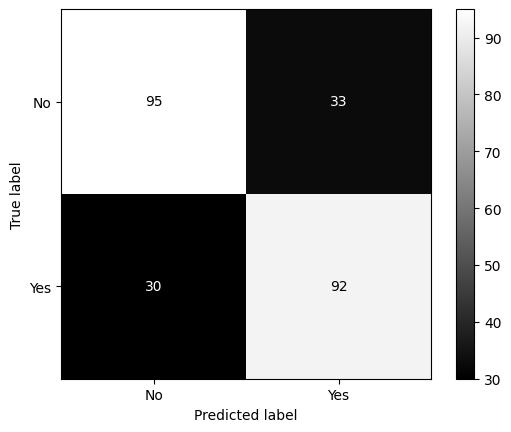

In [86]:
print("Model accuracy: ", accuracy_score(y_test, predictions))

c_matrix= confusion_matrix(y_test, predictions, labels= model.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= c_matrix, display_labels= model.classes_)
disp.plot(cmap="gray")

In [91]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

#Parametros

parameters= {
    "solver": ["liblinear", "newton-cg","lbfgs", "sag", "saga"],
    "multi_class": ["ovr", "multinomial"]
}

log_reg= LogisticRegression()

model2= GridSearchCV(
    log_reg,
    param_grid= parameters,
    scoring= "accuracy",
    cv= 10
)

model2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

In [92]:
print("Mejores hiperparametros: ", model2.best_params_)
print("Mejor accuracy: ", model2.best_score_)

Mejores hiperparametros:  {'multi_class': 'multinomial', 'solver': 'newton-cg'}
Mejor accuracy:  0.7506666666666668


0.748


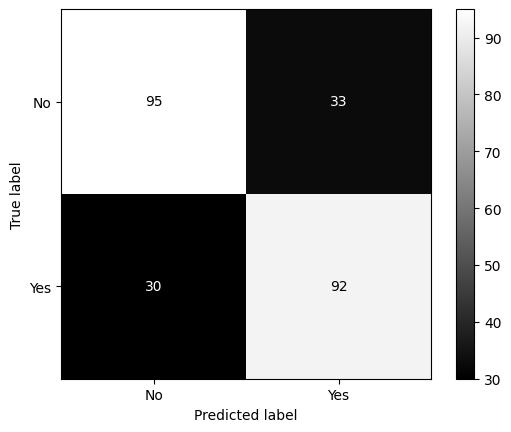

In [93]:
predictions= model2.predict(X_test)
print(accuracy_score(y_test, predictions))

c_matrix= confusion_matrix(y_test, predictions, labels= model2.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= c_matrix, display_labels= model2.classes_)
disp.plot(cmap="gray")